In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc
import cv2
# read the dataset
digits = pd.read_csv('/content/cereal - Copy.csv',sep=";")
digits.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912


In [ ]:
X = digits.iloc[1:, 3:]
Y = digits.iloc[1:, 2]

# Rescaling the features
from sklearn.preprocessing import scale
X = scale(X)

# train test split with train_size=10% and test size=90%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48, 13)
(48, 13)
(48,)
(48,)


In [ ]:
from sklearn import svm
from sklearn import metrics
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions = svm_linear.predict(x_test)
predictions

array(['C', 'C', 'C', 'C', 'C', 'C', 'H', 'C', 'C', 'C', 'C', 'H', 'C',
       'C', 'H', 'H', 'C', 'C', 'C', 'H', 'C', 'C', 'C', 'H', 'C', 'C',
       'C', 'C', 'H', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'C', 'H', 'C',
       'H', 'H', 'H', 'C', 'C', 'C', 'C', 'C', 'C'], dtype=object)

In [ ]:
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion

array([[31,  3],
       [ 0, 14]])

In [ ]:
metrics.accuracy_score(y_true=y_test, y_pred=predictions)

0.9375

In [ ]:
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

              precision    recall  f1-score   support

           C       1.00      0.91      0.95        34
           H       0.82      1.00      0.90        14

    accuracy                           0.94        48
   macro avg       0.91      0.96      0.93        48
weighted avg       0.95      0.94      0.94        48



### NON LINEAR KERNEL

In [ ]:
# rbf kernel with other hyperparameters kept to default 
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# predict
predictions = svm_rbf.predict(x_test)
# accuracy 
print(metrics.accuracy_score(y_true=y_test, y_pred=predictions))

0.9791666666666666


In [ ]:
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

              precision    recall  f1-score   support

           C       0.97      1.00      0.99        34
           H       1.00      0.93      0.96        14

    accuracy                           0.98        48
   macro avg       0.99      0.96      0.97        48
weighted avg       0.98      0.98      0.98        48



In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10, 100], 
             'gamma': [1e-2, 1e-3, 1e-4]}

# instantiate a model 
svc_grid_search = svm.SVC(kernel="rbf")

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters,return_train_score=True, scoring='accuracy')

# fit
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [ ]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000795,0.000225,0.000443,0.000133,1,0.01,"{'C': 1, 'gamma': 0.01}",0.8,0.9,0.9,1.000000,1.000000,0.920000,0.074833,4,0.842105,0.973684,0.973684,0.948718,0.948718,0.937382,0.048929
1,0.000677,0.000023,0.000454,0.000146,1,0.001,"{'C': 1, 'gamma': 0.001}",0.8,0.8,0.8,0.888889,0.888889,0.835556,0.043546,7,0.842105,0.842105,0.842105,0.820513,0.820513,0.833468,0.010578
2,0.000678,0.000048,0.000441,0.000085,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.8,0.8,0.8,0.888889,0.888889,0.835556,0.043546,7,0.842105,0.842105,0.842105,0.820513,0.820513,0.833468,0.010578
3,0.000659,0.000018,0.000423,0.000037,10,0.01,"{'C': 10, 'gamma': 0.01}",1.0,0.9,0.9,1.000000,1.000000,0.960000,0.048990,2,1.000000,0.973684,0.973684,1.000000,1.000000,0.989474,0.012892
4,0.000648,0.000012,0.000393,0.000020,10,0.001,"{'C': 10, 'gamma': 0.001}",0.8,0.9,0.9,1.000000,1.000000,0.920000,0.074833,4,0.842105,0.973684,0.973684,0.948718,0.948718,0.937382,0.048929
5,0.000652,0.000023,0.000393,0.000024,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.8,0.8,0.8,0.888889,0.888889,0.835556,0.043546,7,0.842105,0.842105,0.842105,0.820513,0.820513,0.833468,0.010578
6,0.000638,0.000030,0.000386,0.000033,100,0.01,"{'C': 100, 'gamma': 0.01}",1.0,1.0,1.0,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.000645,0.000050,0.000400,0.000030,100,0.001,"{'C': 100, 'gamma': 0.001}",1.0,0.9,0.9,1.000000,1.000000,0.960000,0.048990,2,1.000000,0.973684,0.973684,1.000000,1.000000,0.989474,0.012892
8,0.000703,0.000087,0.000440,0.000073,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.8,0.9,0.9,1.000000,1.000000,0.920000,0.074833,4,0.842105,0.973684,0.973684,0.948718,0.948718,0.937382,0.048929


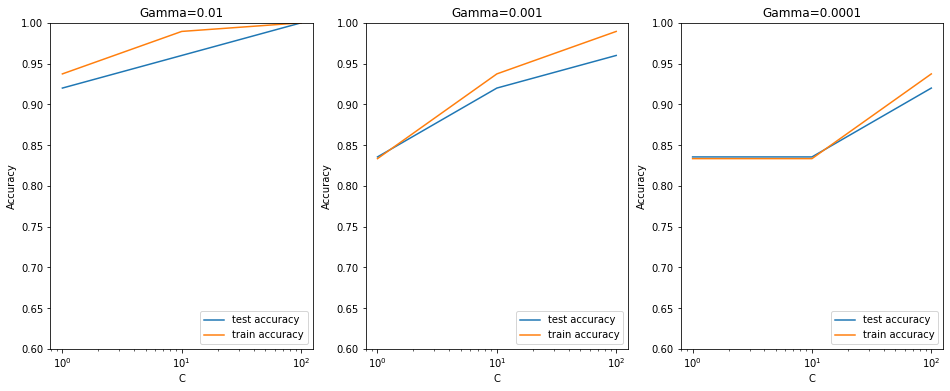

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

In [ ]:
# optimal hyperparameters
best_C = 100
best_gamma = 0.001

# model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# fit
svm_final.fit(x_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# predict
predictions = svm_final.predict(x_test)

In [ ]:
# evaluation: CM 
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)

# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)

print(test_accuracy*100, "%\n")
print(confusion)


91.66666666666666 %

[[31  3]
 [ 1 13]]
